# complete using CNN

### Import Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [2]:
from sklearn.utils import shuffle
from skimage.transform import resize
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
from sklearn import metrics

### collect paths



In [3]:
cloudy=glob('cloudy/*.jpg')[0:500]
desert=glob('desert/*.jpg')[0:500]
green=glob('green_area/*.jpg')[0:500]
water=glob('water/*.jpg')[0:500]

### define classes amd labels



In [4]:
dic={0:'cloudy',1:'desert',2:'green_area',3:'water'}

In [5]:
len(cloudy)

500

### load and label images for each category

In [6]:
labels=[]
images=[]

for i in cloudy:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    

for i in desert:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)

### plot images

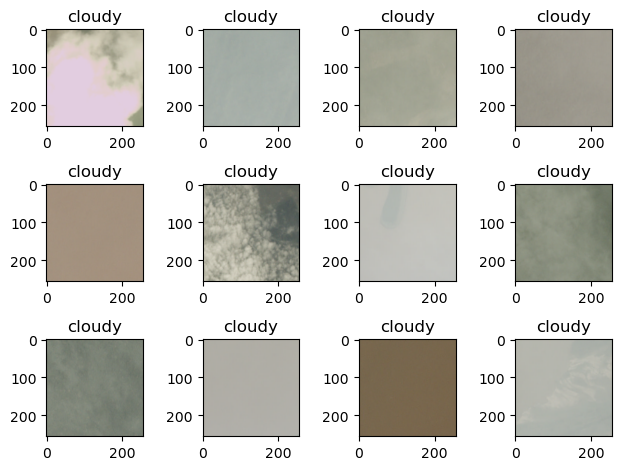

In [7]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### shuffle

In [8]:
images,labels=shuffle(images,labels)

### plot images

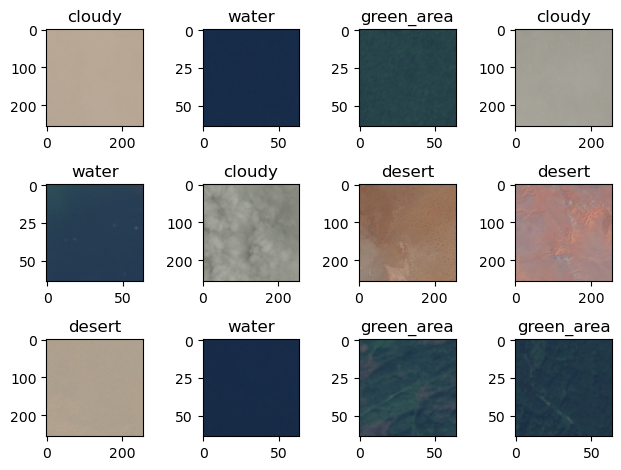

In [9]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### resize images

In [10]:
X=[]

for i in images:
    X.append(resize(i,(224,224,3)))

### plot after resizing

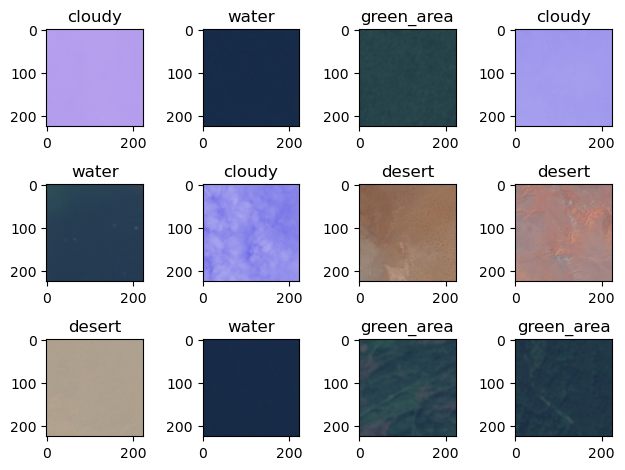

In [11]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### convert into numpy

In [12]:
X=np.array(X)
y=np.array(labels)

### spit the data

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### build model

In [14]:
model=Sequential([
    layers.Conv2D(12,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPool2D(),
    
    layers.Conv2D(12,(3,3),activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax')
])

### compile

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### train



In [21]:
y_train.shape

(1600,)

In [22]:
X_train.shape

(1600, 224, 224, 3)

In [23]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10


48/48 [==============================] - 13s 220ms/step - loss: 0.7261 - accuracy: 0.6283 - val_loss: 0.3841 - val_accuracy: 0.7000
Epoch 2/10
48/48 [==============================] - 9s 193ms/step - loss: 0.3550 - accuracy: 0.7724 - val_loss: 0.4290 - val_accuracy: 0.7875
Epoch 3/10
48/48 [==============================] - 9s 194ms/step - loss: 0.3600 - accuracy: 0.7645 - val_loss: 0.3806 - val_accuracy: 0.7500
Epoch 4/10
48/48 [==============================] - 9s 184ms/step - loss: 0.3243 - accuracy: 0.7895 - val_loss: 0.4083 - val_accuracy: 0.7000
Epoch 5/10
48/48 [==============================] - 9s 181ms/step - loss: 0.3804 - accuracy: 0.7520 - val_loss: 0.3568 - val_accuracy: 0.8125
Epoch 6/10
48/48 [==============================] - 9s 189ms/step - loss: 0.3417 - accuracy: 0.7776 - val_loss: 0.3613 - val_accuracy: 0.7125
Epoch 7/10
48/48 [==============================] - 10s 200ms/step - loss: 0.3140 - accuracy: 0.8072 - val_loss: 0.3328 - val_accuracy: 0.8250
Ep

### model prediction

In [24]:
y_pred=model.predict(X_test)

13/13 [==============================] - 1s 49ms/step


In [25]:
y_pred=[np.argmax(i) for i in y_pred]

### accuracy score

In [26]:
metrics.accuracy_score(y_test,y_pred)

0.8325

### confusion matrix

<Axes: >

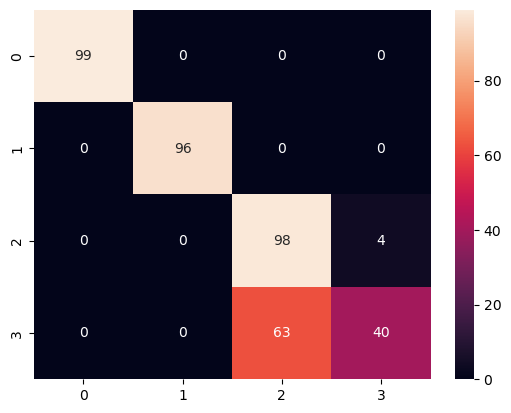

In [27]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### classification report

In [28]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        96
           2       0.61      0.96      0.75       102
           3       0.91      0.39      0.54       103

    accuracy                           0.83       400
   macro avg       0.88      0.84      0.82       400
weighted avg       0.88      0.83      0.82       400

